In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 🔹 Load the dataset (Karnataka)
df = pd.read_csv('Karnataka_Colleges.csv')  # Make sure both datasets are merged

In [ ]:
# 🔹 Fill any missing values
df.fillna(0, inplace=True)

In [ ]:
# 🔹 Convert categorical XFO and TLS_Version to numeric (label encoding)
df['XFO'] = df['XFO'].astype(str).astype('category').cat.codes
df['TLS_Version'] = df['TLS_Version'].astype(str).astype('category').cat.codes

In [ ]:
# 🔹 Features to consider (use only header-related columns)
features = ['HSTS', 'HSTS_max_age', 'CSP', 'XCTO', 'XFO',
            'Referrer_Policy', 'Perm_Policy', 'TLS_Version',
            'Cookie_HttpOnly', 'Cookie_Secure']

X = df[features]

In [ ]:
# Ensure all feature columns are numeric (0/1 or integers)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Now you can calculate the security score safely
df['Security_Score'] = X.sum(axis=1)


In [ ]:
# 🔹 Label: If security score >= 4 → Secure (1), else Not Secure (0)
df['Label'] = df['Security_Score'].apply(lambda x: 1 if x >= 4 else 0)
y = df['Label']

In [ ]:
# 🔹 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# 🔹 Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 🔹 Predict
y_pred = model.predict(X_test)

In [ ]:
# 🔹 Evaluate
print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.67      0.80         3

    accuracy                           0.92        12
   macro avg       0.95      0.83      0.87        12
weighted avg       0.92      0.92      0.91        12



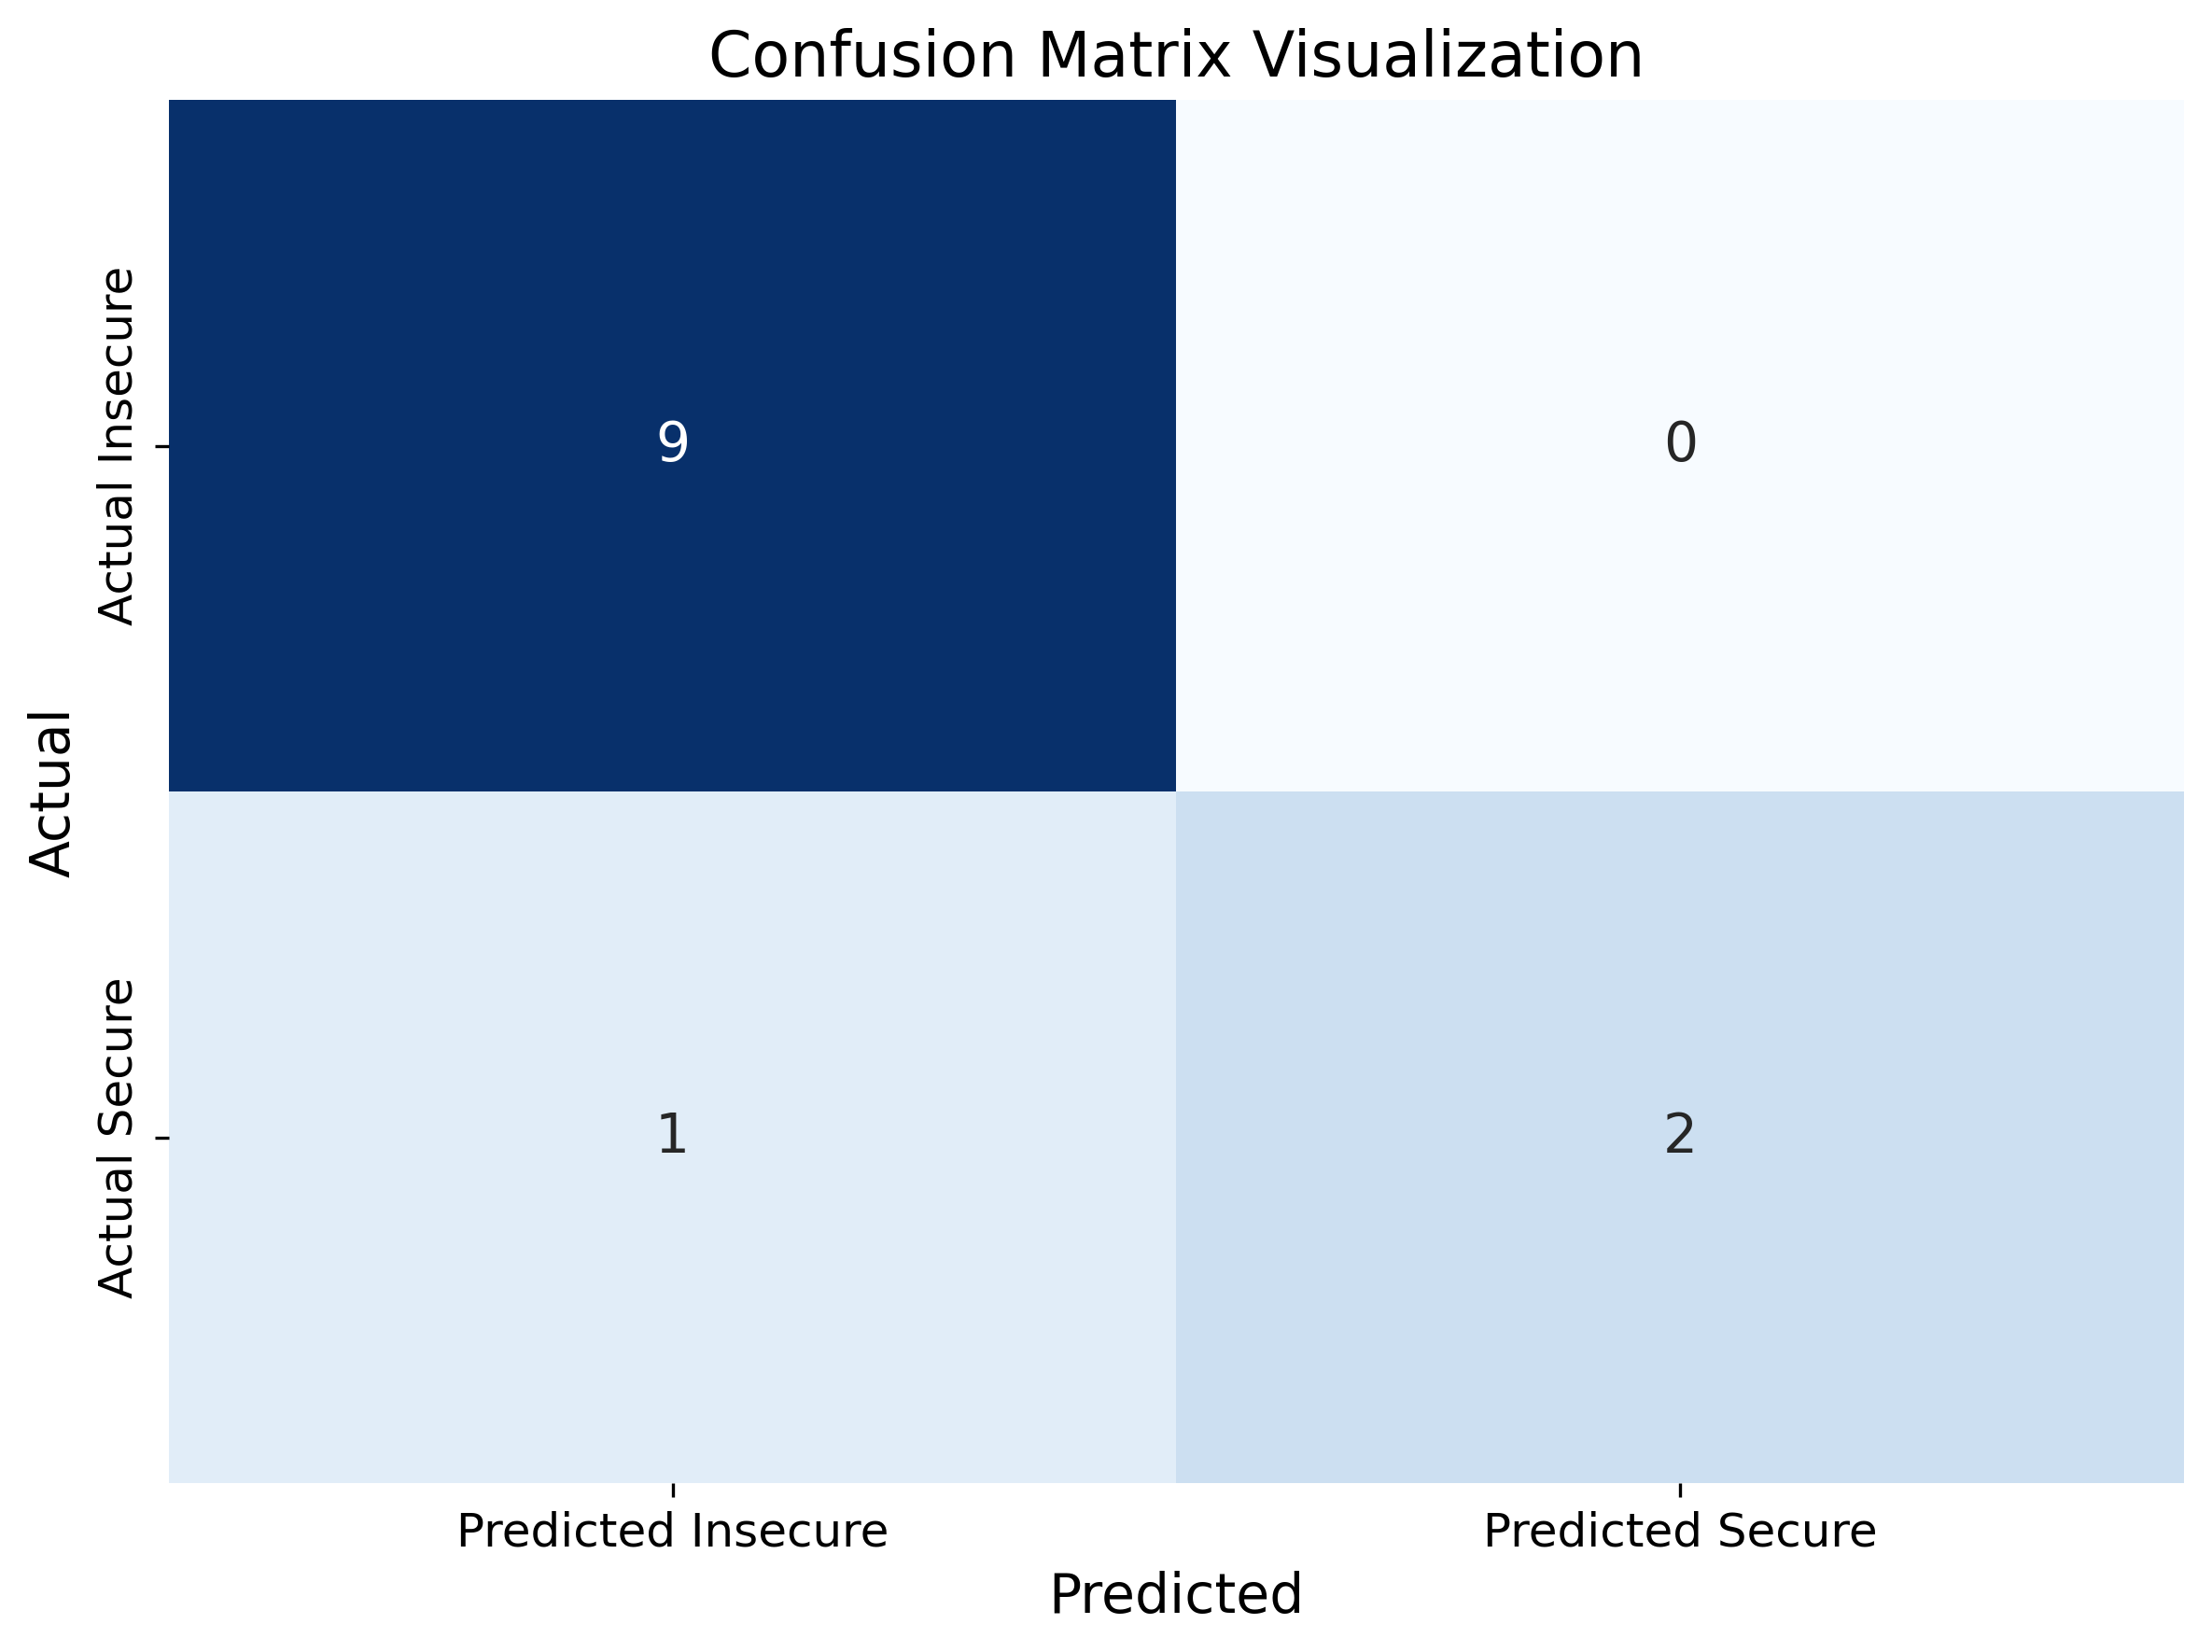

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot as heatmap
plt.figure(figsize=(8, 6), dpi=300)  # Increase figure size and dpi for better quality
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Insecure', 'Predicted Secure'],
            yticklabels=['Actual Insecure', 'Actual Secure'],
            annot_kws={"size": 14})  # Bigger annotation font size

plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix Visualization', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save high quality image
plt.savefig('confusion_matrix_high_quality.png', dpi=300, bbox_inches='tight')

plt.show()

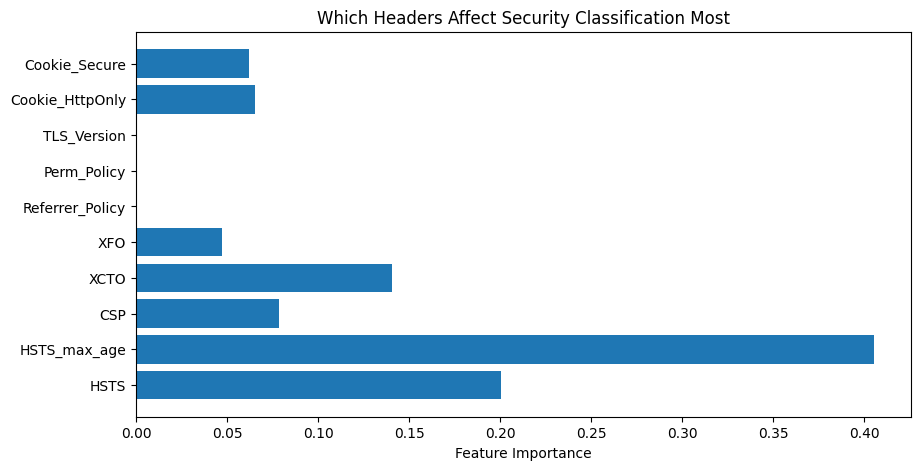

In [ ]:
import matplotlib.pyplot as plt

# 🔹 Feature importance
importances = model.feature_importances_
feature_names = X.columns

# 🔹 Bar Plot
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Which Headers Affect Security Classification Most")
plt.show()


/tmp/ipython-input-14-1449610510.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['Importance (%)'] = (top5['Importance'] * 100).round(2)


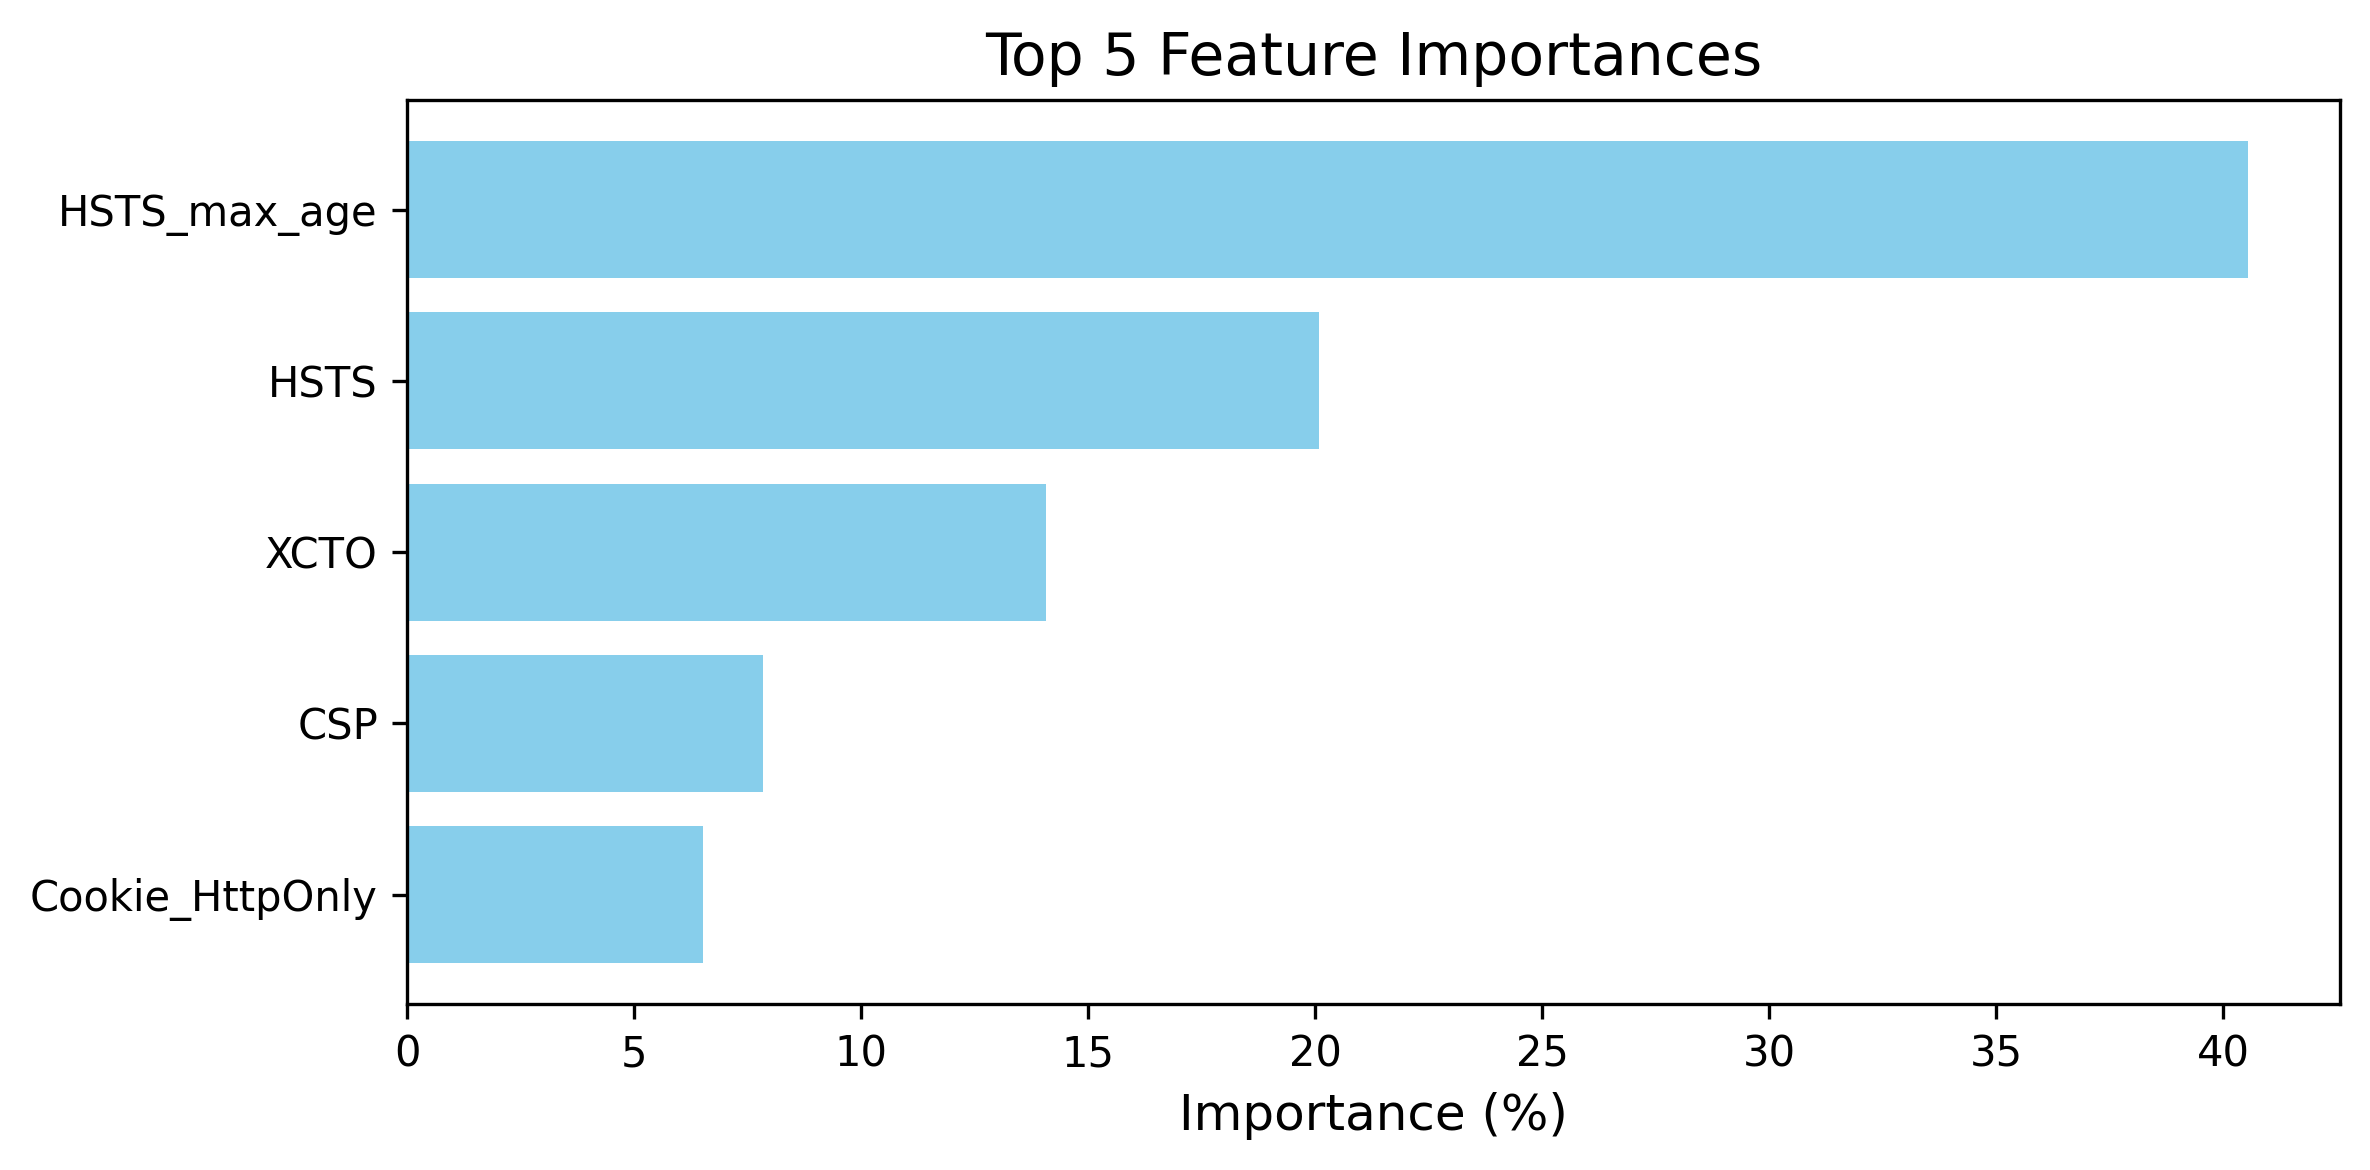


📊 Top 5 Feature Importances (%):

        Feature  Importance (%)
   HSTS_max_age           40.55
           HSTS           20.08
           XCTO           14.07
            CSP            7.84
Cookie_HttpOnly            6.53


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔹 Feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy sorting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance descending
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Select top 5 features
top5 = feat_imp_df.head(5)

# Convert importance to percentage
top5['Importance (%)'] = (top5['Importance'] * 100).round(2)

# Plot top 5 features
plt.figure(figsize=(8, 4), dpi=300)  # Set high dpi for quality
plt.barh(top5['Feature'][::-1], top5['Importance (%)'][::-1], color='skyblue')
plt.xlabel("Importance (%)", fontsize=12)
plt.title("Top 5 Feature Importances", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save high-quality image
plt.savefig('top5_feature_importances_high_quality.png', dpi=300, bbox_inches='tight')

plt.show()

# Print top 5 features with importance in text form
print("\n📊 Top 5 Feature Importances (%):\n")
print(top5[['Feature', 'Importance (%)']].to_string(index=False))


In [ ]:
import pandas as pd

# Manually enter top 5 features and their importance for both datasets (as %)
karnataka_data = {
    'Feature': ['HSTS_max_age', 'HSTS', 'XCTO', 'CSP', 'Cookie_HttpOnly'],
    'Karnataka (%)': [40.55, 20.08, 14.07, 7.84, 6.53]
}

tamilnadu_data = {
    'Feature': ['XFO', 'HSTS_max_age', 'HSTS', 'XCTO', 'Cookie_HttpOnly'],
    'Tamil Nadu (%)': [32.30, 25.02, 16.06, 14.90, 10.16]
}

# Convert to DataFrames
df_kar = pd.DataFrame(karnataka_data)
df_tn = pd.DataFrame(tamilnadu_data)

# Merge based on Feature names (outer join to preserve all)
df_comparison = pd.merge(df_kar, df_tn, on='Feature', how='outer')

# Replace NaN with 0 for clarity
df_comparison.fillna(0, inplace=True)

# Round the percentages for consistency
df_comparison['Karnataka (%)'] = df_comparison['Karnataka (%)'].round(2)
df_comparison['Tamil Nadu (%)'] = df_comparison['Tamil Nadu (%)'].round(2)

# Sort by Karnataka (%) for display
df_comparison.sort_values(by='Karnataka (%)', ascending=False, inplace=True)

# Display the comparative table
print("\n📊 Comparative Feature Importances (Top 5):\n")
print(df_comparison.to_string(index=False))



📊 Comparative Feature Importances (Top 5):

        Feature  Karnataka (%)  Tamil Nadu (%)
   HSTS_max_age          40.55           25.02
           HSTS          20.08           16.06
           XCTO          14.07           14.90
            CSP           7.84            0.00
Cookie_HttpOnly           6.53           10.16
            XFO           0.00           32.30


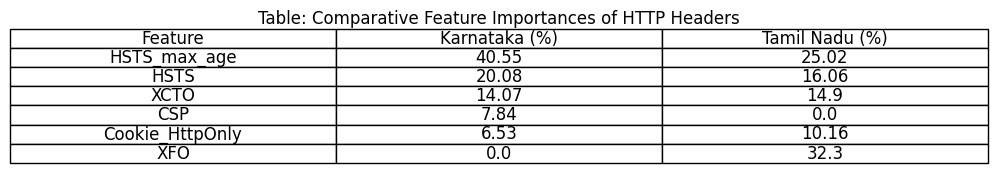

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Feature': ['HSTS_max_age', 'HSTS', 'XCTO', 'CSP', 'Cookie_HttpOnly', 'XFO'],
    'Karnataka (%)': [40.55, 20.08, 14.07, 7.84, 6.53, 0],
    'Tamil Nadu (%)': [25.02, 16.06, 14.90, 0, 10.16, 32.30]
}

df = pd.DataFrame(data)

# Plot table
fig, ax = plt.subplots(figsize=(10, 2))
ax.axis('off')  # no axes

# Draw table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)

plt.title("Table: Comparative Feature Importances of HTTP Headers", pad=20)
plt.tight_layout()
plt.show()
